## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
Adam : mac2018pro 並無外接nvidia 
"""

!nvidia-smi


# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

%matplotlib inline

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
#原本是X/255 這邊改為max/min 並調整在-1~1之間
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
#增加層數
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 30]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)               

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 5s 26ms/step - loss: 1.7582 - accuracy: 0.3720 - val_loss: 1.5960 - val_accuracy: 0.4362
Epoch 2/100
196/196 [==============================] - 5s 26ms/step - loss: 1.5167 - accuracy: 0.4667 - val_loss: 1.4680 - val_accuracy: 0.4869
Epoch 3/100
196/196 [==============================] - 5s 27ms/step - loss: 1.3904 - accuracy: 0.5100 - val_loss: 1.3994 - val_accuracy: 0.5062
Epoch 4/100
196/196 [==============================] - 6s 28ms/step - loss: 1.2901 - accuracy: 0.5463 - val_loss: 1.3896 - val_accuracy: 0.5094
Epoch 5/100
196/196 [==============================] - 5s 27ms/step - loss: 1.1992 - accuracy: 0.5784 - val_loss: 1.3653 - val_accuracy: 0.5234
Epoch 6/100
196/196 [==============================] - 5s 28ms/step - loss: 1.1170 - accuracy: 0.6059 - val_loss: 1.3543 - val_accuracy: 0.5350
Epoch 7/100
196/196 [==============================] - 5s 28ms/step - loss: 1.0314 - accuracy: 0.6358 - val_loss: 1.3580 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 0.0923 - accuracy: 0.9715 - val_loss: 3.2484 - val_accuracy: 0.5382
Epoch 58/100
196/196 [==============================] - 6s 30ms/step - loss: 0.0760 - accuracy: 0.9752 - val_loss: 3.5577 - val_accuracy: 0.5457
Epoch 59/100
196/196 [==============================] - 6s 30ms/step - loss: 0.0832 - accuracy: 0.9738 - val_loss: 3.4990 - val_accuracy: 0.5441
Epoch 60/100
196/196 [==============================] - 6s 30ms/step - loss: 0.0760 - accuracy: 0.9762 - val_loss: 3.6432 - val_accuracy: 0.5409
Epoch 61/100
196/196 [==============================] - 6s 31ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 3.5594 - val_accuracy: 0.5386
Epoch 62/100
196/196 [==============================] - 6s 30ms/step - loss: 0.0725 - accuracy: 0.9770 - val_loss: 3.7477 - val_accuracy: 0.5387
Epoch 63/100
196/196 [==============================] - 6s 29ms/step - loss: 0.0847 - accuracy: 0.9732 - val_loss: 3.6184 - val_accuracy: 0.534

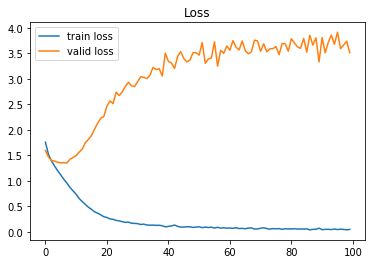

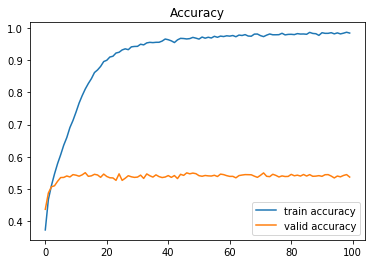

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()